In [ ]:
%pip install pandas numpy matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


Imports and labeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Load mapped data
df = pd.read_csv('../worked_data/mapped_data.csv')
print('Shape:', df.shape)
df.head(5)

/tmp/ipykernel_8515/1339213841.py:10: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../worked_data/mapped_data.csv')


Shape: (6517225, 28)


,CANPROV,COMMODITY2,CONTCODE,COUNTRY,DEPE,DF,DISAGMOT,FREIGHT_CHARGES,MEXSTATE,MONTH,MONTH_FOLDER,SHIPWT,SOURCE_FILE,TRDTYPE,USASTATE,VALUE,YEAR,YEAR_FOLDER,CANPROV_MAPPED,CONTCODE_MAPPED,COUNTRY_MAPPED,DF_MAPPED,DISAGMOT_MAPPED,MEXSTATE_MAPPED,MONTH_MAPPED,PORT_DISTRICT_MAPPED,TRDTYPE_MAPPED,USASTATE_MAPPED
0,XB,NaN,X,1220,0115,2.0,5,67,NaN,4,April_2020,0,dot1_0420.csv,1,AK,4660,2020,2020,New Brunswick,Containerized,Unknown,Unknown,Truck,Unknown,April,"CALAIS, ME",Unknown,Alaska
1,XO,NaN,X,1220,0901,1.0,5,282,NaN,4,April_2020,0,dot1_0420.csv,1,AK,14360,2020,2020,Ontario,Containerized,Unknown,Unknown,Truck,Unknown,April,"BUFFALO-NIAGARA FALLS, NY",Unknown,Alaska
2,NaN,NaN,0,2010,20XX,1.0,1,0,XX,4,April_2020,24971000,dot1_0420.csv,1,AK,4293733,2020,2020,Unknown,Non-Containerized,Unknown,Unknown,Vessel,Unknown,April,Unknown,Unknown,Alaska
3,XA,NaN,X,1220,20XX,1.0,3,563,NaN,4,April_2020,443,dot1_0420.csv,1,AK,28283,2020,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska
4,XA,NaN,X,1220,20XX,2.0,3,538,NaN,4,April_2020,69,dot1_0420.csv,1,AK,29848,2020,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska


Drop Data


In [3]:
# List of original columns that have mapped versions
original_cols_to_drop = [
    'CANPROV',
    'CONTCODE',
    'COUNTRY',
    'DF',
    'DISAGMOT',
    'MEXSTATE',
    'MONTH',
    'DEPE',
    'TRDTYPE',
    'USASTATE',
    "MONTH_FOLDER",
    "SOURCE_FILE",
    "YEAR_FOLDER"
    
]

# Drop only those columns that exist in your DataFrame
cols_to_drop = [col for col in original_cols_to_drop if col in df.columns]
data = df.drop(columns=cols_to_drop)

# Show the new DataFrame structure
data.head()

,COMMODITY2,FREIGHT_CHARGES,SHIPWT,VALUE,YEAR,CANPROV_MAPPED,CONTCODE_MAPPED,COUNTRY_MAPPED,DF_MAPPED,DISAGMOT_MAPPED,MEXSTATE_MAPPED,MONTH_MAPPED,PORT_DISTRICT_MAPPED,TRDTYPE_MAPPED,USASTATE_MAPPED
0,NaN,67,0,4660,2020,New Brunswick,Containerized,Unknown,Unknown,Truck,Unknown,April,"CALAIS, ME",Unknown,Alaska
1,NaN,282,0,14360,2020,Ontario,Containerized,Unknown,Unknown,Truck,Unknown,April,"BUFFALO-NIAGARA FALLS, NY",Unknown,Alaska
2,NaN,0,24971000,4293733,2020,Unknown,Non-Containerized,Unknown,Unknown,Vessel,Unknown,April,Unknown,Unknown,Alaska
3,NaN,563,443,28283,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska
4,NaN,538,69,29848,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska


## 1. Freight Movement Patterns
**What are the dominant freight movement patterns across different transportation modes, and how do these patterns vary by region and time?**

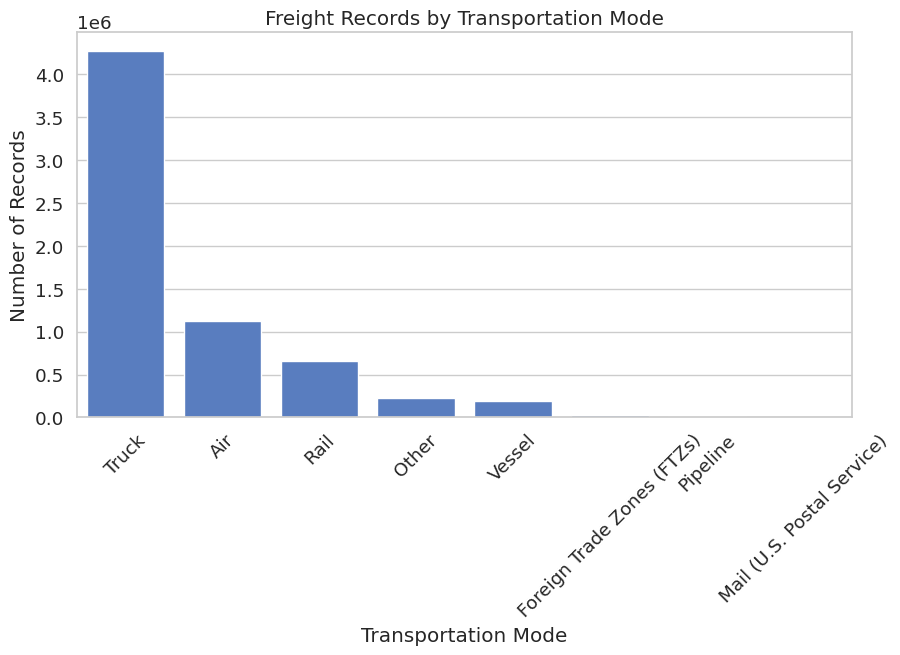

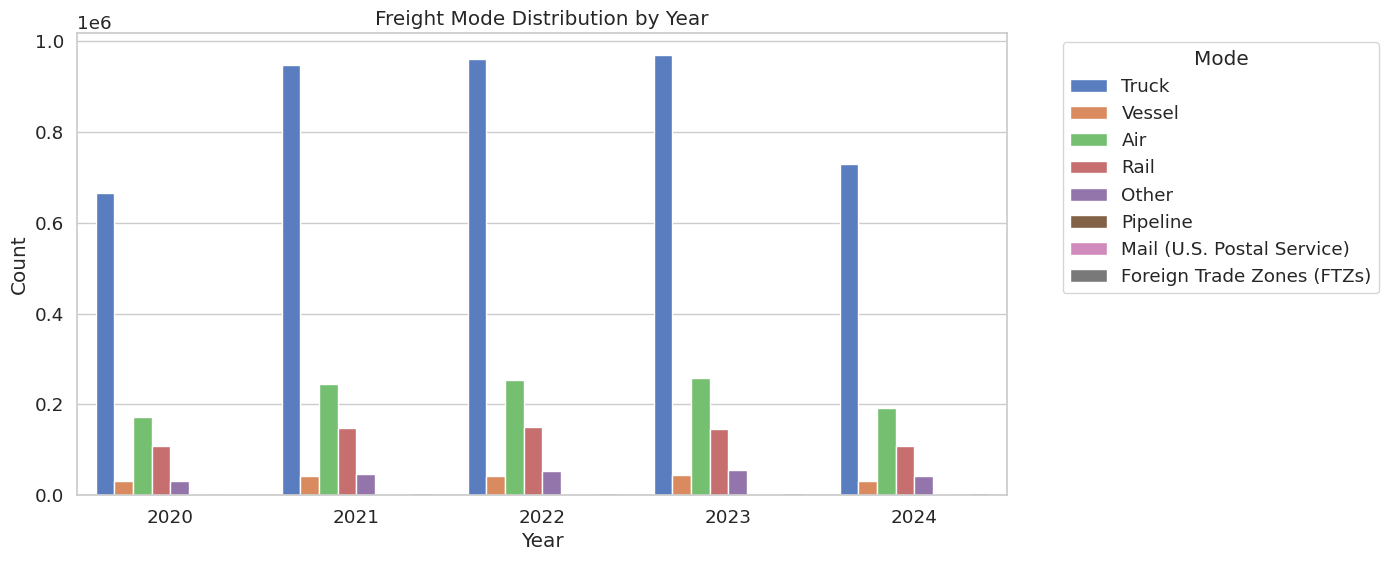

In [4]:
# Dominant transportation modes overall
mode_counts = data['DISAGMOT_MAPPED'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=mode_counts.index, y=mode_counts.values)
plt.title('Freight Records by Transportation Mode')
plt.ylabel('Number of Records')
plt.xlabel('Transportation Mode')
plt.xticks(rotation=45)
plt.show()

# Patterns by US region
if 'US_REGION' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=data, x='US_REGION', hue='DISAGMOT_MAPPED', order=df['US_REGION'].value_counts().index)
    plt.title('Freight Mode Distribution by US Region')
    plt.ylabel('Count')
    plt.xlabel('US Region')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Patterns over time (by year)
if 'YEAR' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=data, x='YEAR', hue='DISAGMOT_MAPPED', order=sorted(df['YEAR'].unique()))
    plt.title('Freight Mode Distribution by Year')
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## 2. Operational Efficiency
**Which transportation modes and routes show the highest inefficiencies in terms of cost per weight ratio and freight charges?**

In [5]:
# Calculate cost per weight ratio
data['COST_PER_WEIGHT'] = df['FREIGHT_CHARGES'] / df['SHIPWT']
data = data.replace([np.inf, -np.inf], np.nan)

data.head()

,COMMODITY2,FREIGHT_CHARGES,SHIPWT,VALUE,YEAR,CANPROV_MAPPED,CONTCODE_MAPPED,COUNTRY_MAPPED,DF_MAPPED,DISAGMOT_MAPPED,MEXSTATE_MAPPED,MONTH_MAPPED,PORT_DISTRICT_MAPPED,TRDTYPE_MAPPED,USASTATE_MAPPED,COST_PER_WEIGHT
0,NaN,67,0,4660,2020,New Brunswick,Containerized,Unknown,Unknown,Truck,Unknown,April,"CALAIS, ME",Unknown,Alaska,NaN
1,NaN,282,0,14360,2020,Ontario,Containerized,Unknown,Unknown,Truck,Unknown,April,"BUFFALO-NIAGARA FALLS, NY",Unknown,Alaska,NaN
2,NaN,0,24971000,4293733,2020,Unknown,Non-Containerized,Unknown,Unknown,Vessel,Unknown,April,Unknown,Unknown,Alaska,0.000000
3,NaN,563,443,28283,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska,1.270880
4,NaN,538,69,29848,2020,Alberta,Containerized,Unknown,Unknown,Air,Unknown,April,Unknown,Unknown,Alaska,7.797101


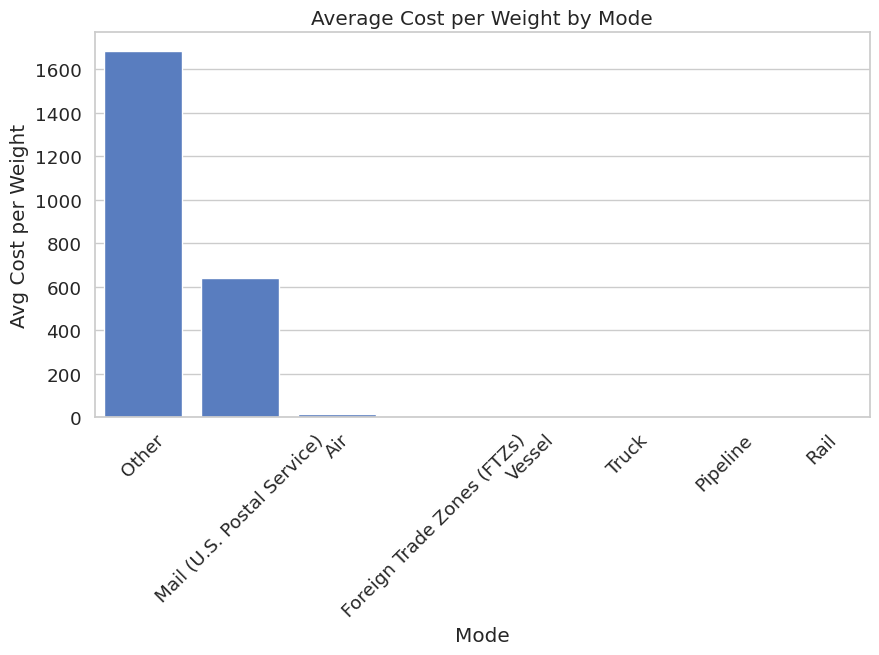

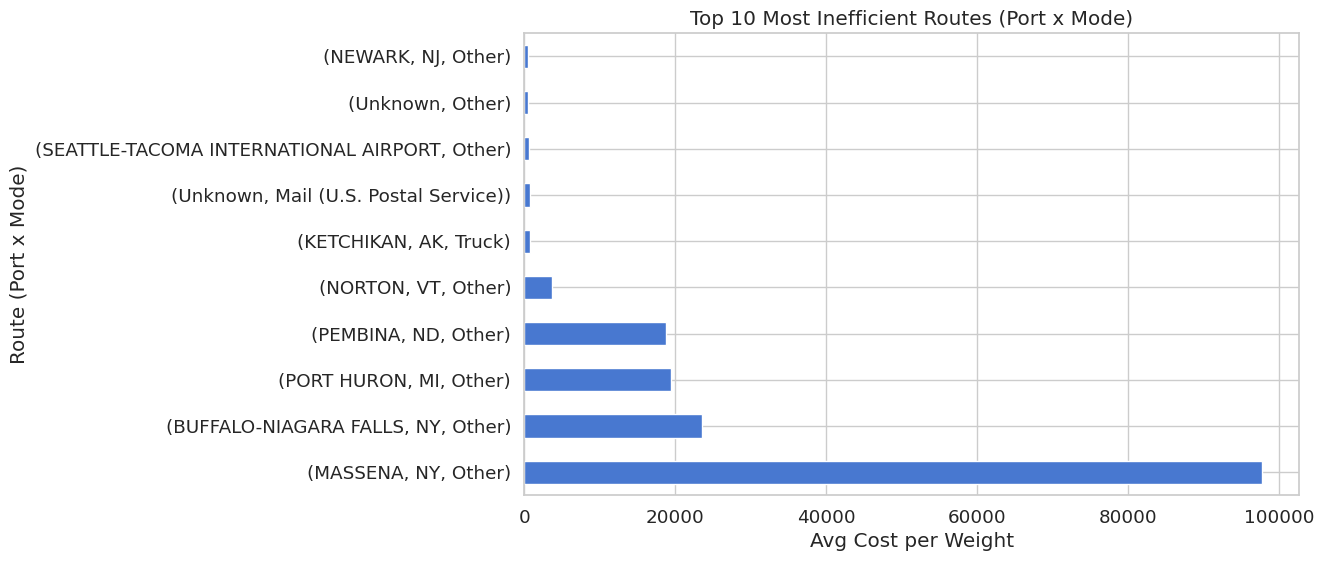

In [6]:

# Inefficiency by mode
mode_ineff = data.groupby('DISAGMOT_MAPPED')['COST_PER_WEIGHT'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=mode_ineff.index, y=mode_ineff.values)
plt.title('Average Cost per Weight by Mode')
plt.ylabel('Avg Cost per Weight')
plt.xlabel('Mode')
plt.xticks(rotation=45)
plt.show()

# Top 10 most inefficient routes (by port district)
if 'PORT_DISTRICT_MAPPED' in data.columns:
    route_ineff = data.groupby(['PORT_DISTRICT_MAPPED', 'DISAGMOT_MAPPED'])['COST_PER_WEIGHT'].mean().sort_values(ascending=False).head(10)
    route_ineff.plot(kind='barh', figsize=(10,6))
    plt.title('Top 10 Most Inefficient Routes (Port x Mode)')
    plt.xlabel('Avg Cost per Weight')
    plt.ylabel('Route (Port x Mode)')
    plt.show()

## 3. Environmental Impact
**How do different transportation modes compare in terms of environmental impact based on weight capacity and regional distribution?**

*Note: We use shipment weight as a proxy for environmental impact (heavier shipments may imply higher emissions, but mode matters most). If you have emissions factors per mode, you can multiply them here.*

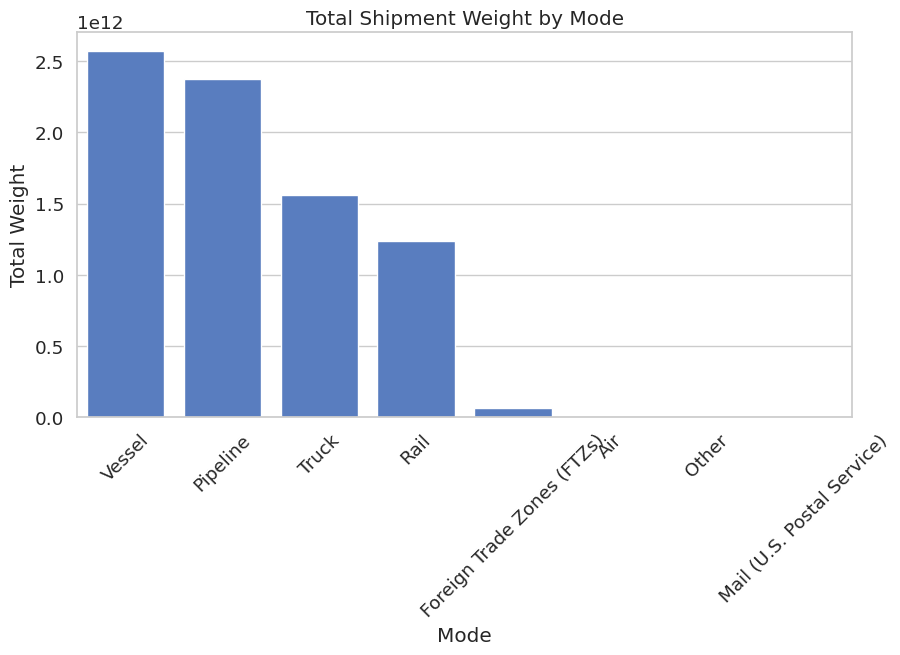

In [7]:
# Total shipment weight by mode
mode_weight = data.groupby('DISAGMOT_MAPPED')['SHIPWT'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=mode_weight.index, y=mode_weight.values)
plt.title('Total Shipment Weight by Mode')
plt.ylabel('Total Weight')
plt.xlabel('Mode')
plt.xticks(rotation=45)
plt.show()

# Regional distribution of weight by mode
if 'US_REGION' in data.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(data=data, x='USASTATE_MAPPED', y='SHIPWT', hue='DISAGMOT_MAPPED', estimator=sum)
    plt.title('Regional Distribution of Weight by Mode')
    plt.ylabel('Total Weight')
    plt.xlabel('US Region')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

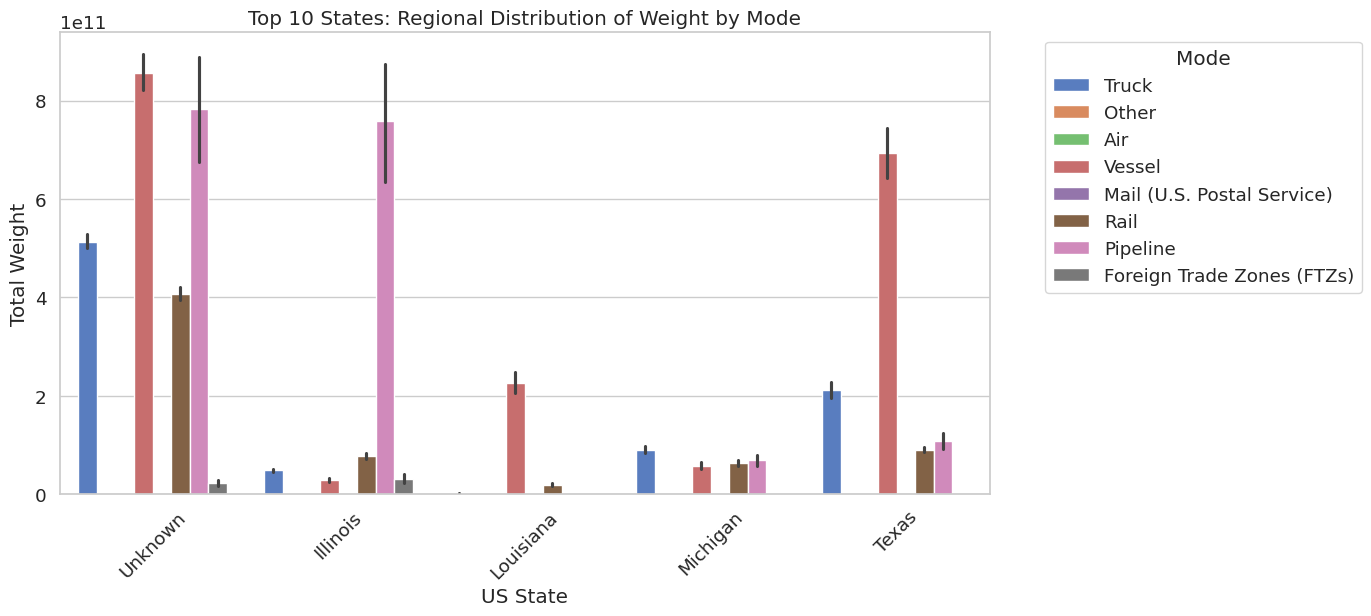

In [11]:
top_states = (
    data.groupby('USASTATE_MAPPED')['SHIPWT'].sum().sort_values(ascending=False).head(5).index
)
plt.figure(figsize=(12,6))
sns.barplot(
    data=data[data['USASTATE_MAPPED'].isin(top_states)],
    x='USASTATE_MAPPED',
    y='SHIPWT',
    hue='DISAGMOT_MAPPED',
    estimator=sum
)
plt.title('Top 10 States: Regional Distribution of Weight by Mode')
plt.ylabel('Total Weight')
plt.xlabel('US State')
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## 4. Cross-Border Trade Analysis
**What are the key trade patterns between the US, Mexico, and Canada, and which modes are most utilized for cross-border freight?**

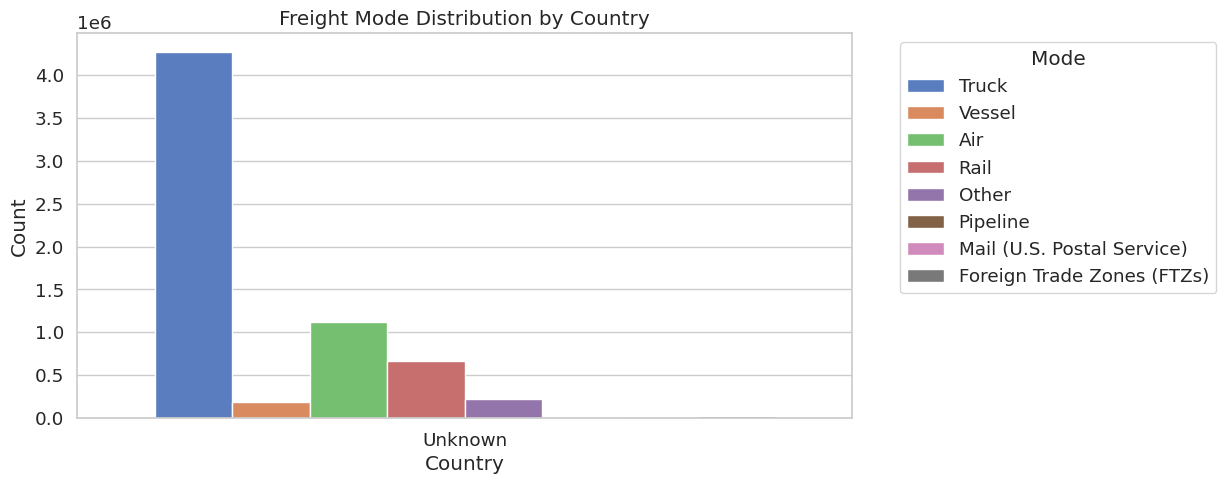

Most used mode per country:
COUNTRY_MAPPED
Unknown    Truck
Name: DISAGMOT_MAPPED, dtype: object


In [12]:
# Trade patterns by country
if 'COUNTRY_MAPPED' in data.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x='COUNTRY_MAPPED', hue='DISAGMOT_MAPPED')
    plt.title('Freight Mode Distribution by Country')
    plt.ylabel('Count')
    plt.xlabel('Country')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Most used mode per country
    print('Most used mode per country:')
    print(data.groupby('COUNTRY_MAPPED')['DISAGMOT_MAPPED'].agg(lambda x: x.value_counts().idxmax()))

## 5. Seasonal Trends
**How do freight movements and costs vary seasonally across different transportation modes?**

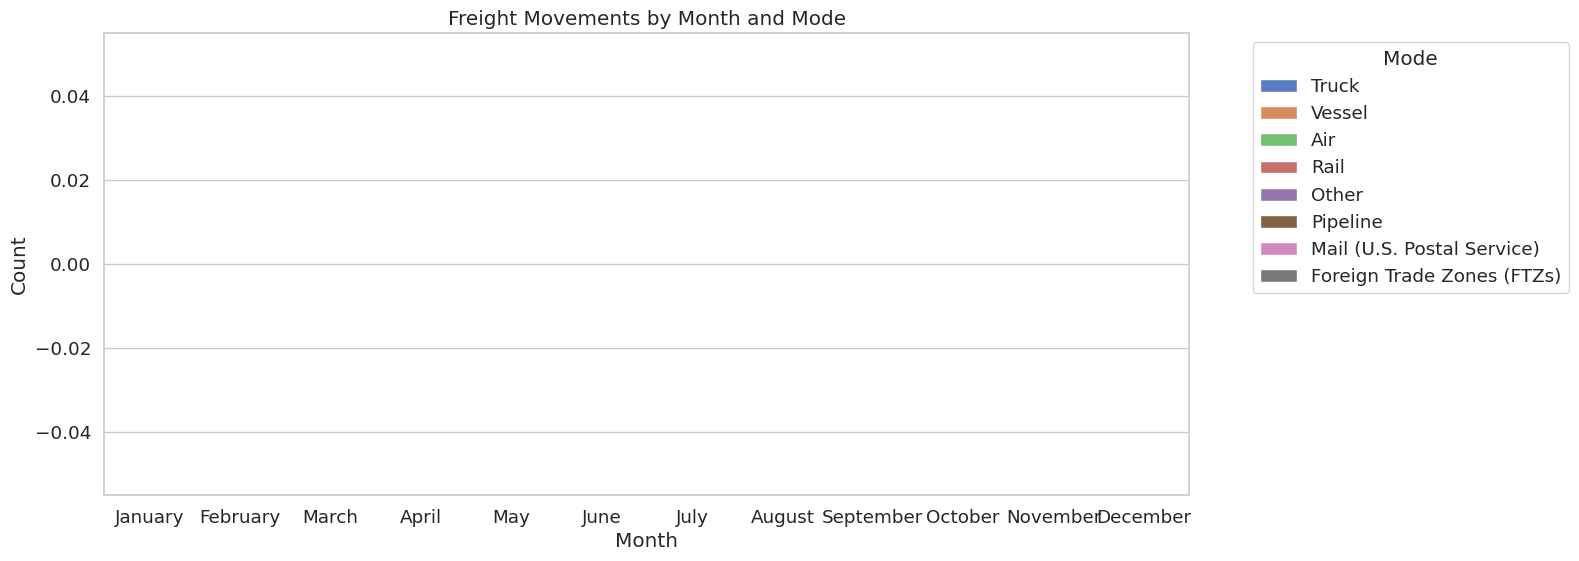

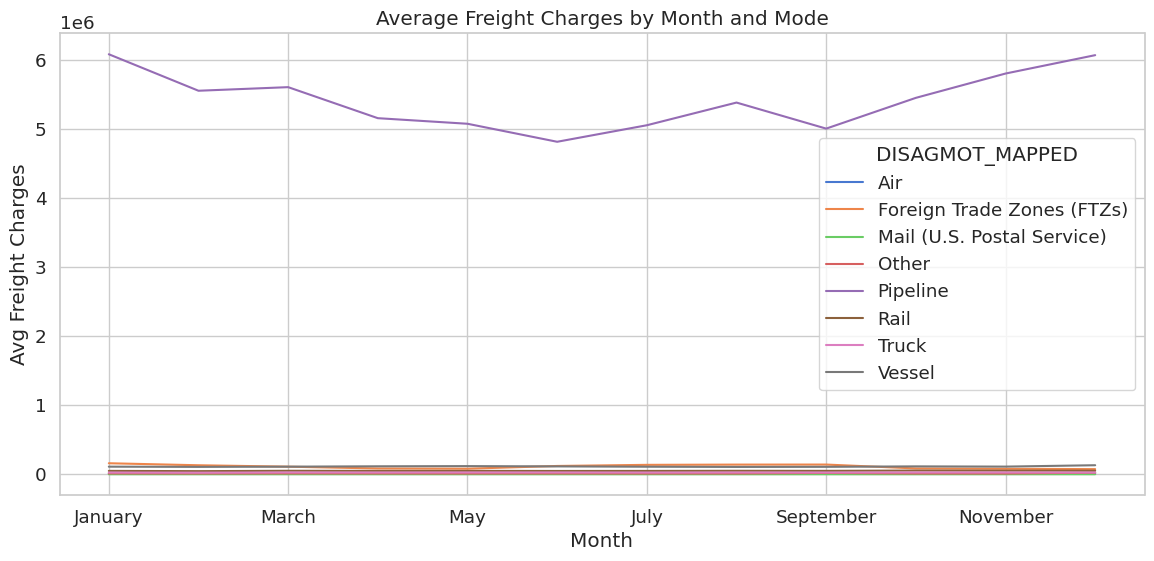

In [ ]:
# If MONTH_MAPPED exists, use it
if 'MONTH_MAPPED' in data.columns:
    plt.figure(figsize=(14,6))
    sns.countplot(data=data, x='MONTH_MAPPED', hue='DISAGMOT_MAPPED', order=[
        'January','February','March','April','May','June','July','August','September','October','November','December'
    ])
    plt.title('Freight Movements by Month and Mode')
    plt.ylabel('Count')
    plt.xlabel('Month')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Average freight charges by month and mode
    charges = data.groupby(['MONTH_MAPPED','DISAGMOT_MAPPED'])['FREIGHT_CHARGES'].mean().unstack()
    charges.loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(kind='line', figsize=(14,6))
    plt.title('Average Freight Charges by Month and Mode')
    plt.ylabel('Avg Freight Charges')
    plt.xlabel('Month')
    plt.show()

## 6. Economic Disruption Impact
**How do trade values and freight movements correlate with economic indicators across different time periods?**

We analyze the correlation between trade value, freight charges, and shipment weight over time. For full economic indicator correlation, external data would be needed.

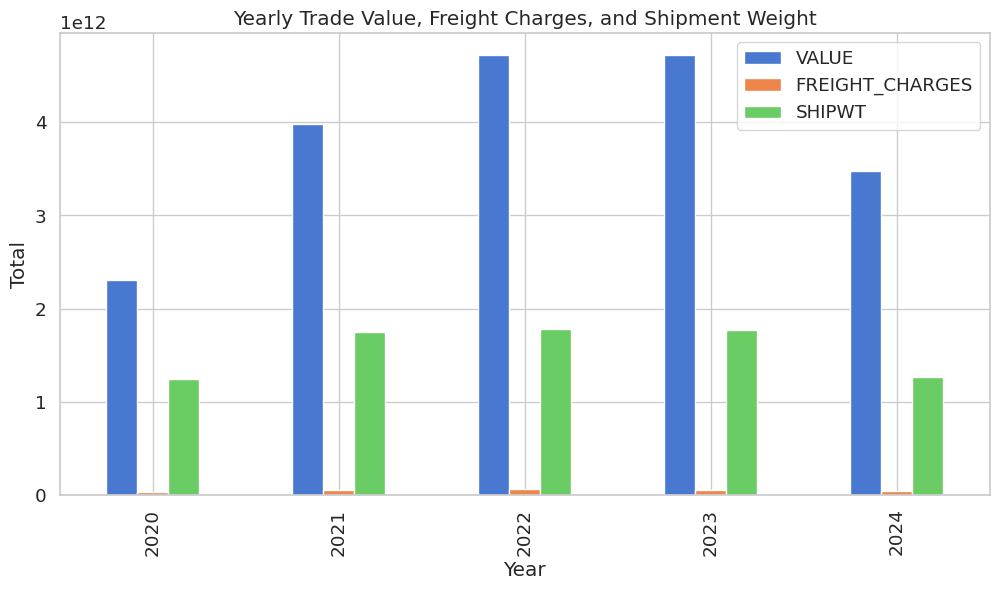

Correlation matrix:
                    VALUE  FREIGHT_CHARGES    SHIPWT
VALUE            1.000000         0.981896  0.881707
FREIGHT_CHARGES  0.981896         1.000000  0.939409
SHIPWT           0.881707         0.939409  1.000000


In [14]:
# Correlation between VALUE and FREIGHT_CHARGES over time
if 'YEAR' in data.columns:
    yearly = data.groupby('YEAR').agg({'VALUE':'sum','FREIGHT_CHARGES':'sum','SHIPWT':'sum'})
    yearly[['VALUE','FREIGHT_CHARGES','SHIPWT']].plot(kind='bar', figsize=(12,6))
    plt.title('Yearly Trade Value, Freight Charges, and Shipment Weight')
    plt.ylabel('Total')
    plt.xlabel('Year')
    plt.show()
    
    # Correlation matrix
    print('Correlation matrix:')
    print(yearly.corr())

## 7. Infrastructure Utilization
**Which ports and districts show the highest utilization rates, and where are potential bottlenecks?**

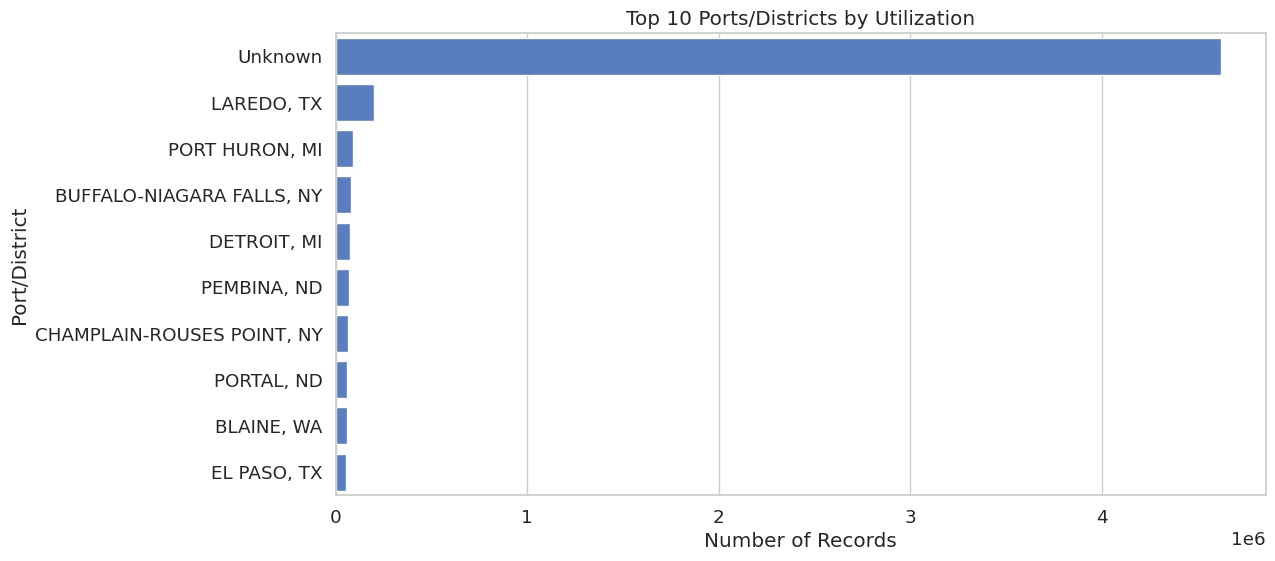

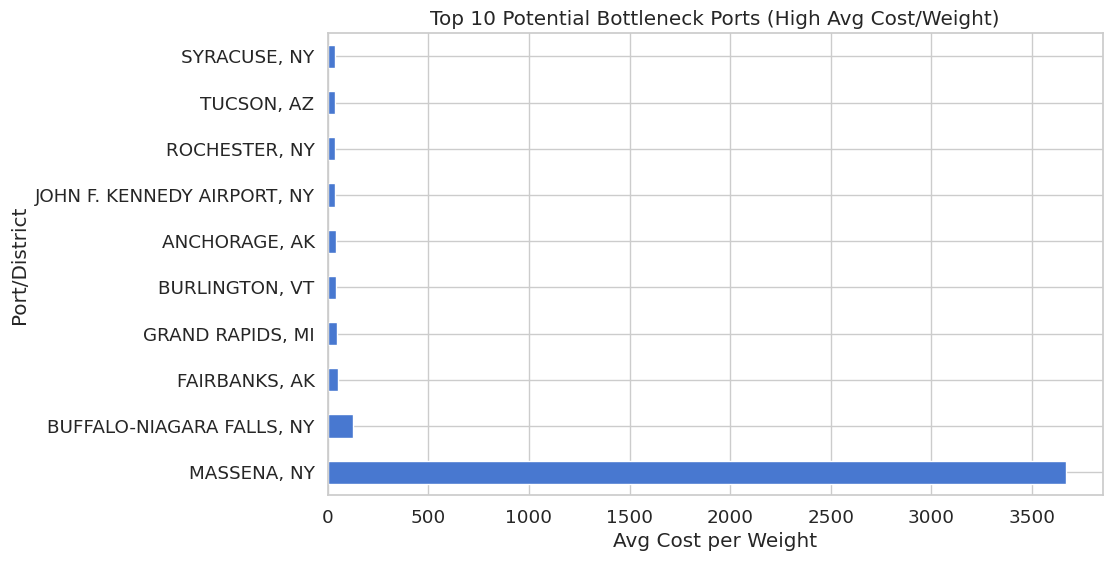

In [15]:
# Top 10 ports/districts by record count
if 'PORT_DISTRICT_MAPPED' in data.columns:
    port_counts = data['PORT_DISTRICT_MAPPED'].value_counts().head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=port_counts.values, y=port_counts.index)
    plt.title('Top 10 Ports/Districts by Utilization')
    plt.xlabel('Number of Records')
    plt.ylabel('Port/District')
    plt.show()
    
    # Potential bottlenecks: ports with high count but high avg cost per weight
    port_ineff = data.groupby('PORT_DISTRICT_MAPPED')['COST_PER_WEIGHT'].mean().sort_values(ascending=False).head(10)
    port_ineff.plot(kind='barh', figsize=(10,6))
    plt.title('Top 10 Potential Bottleneck Ports (High Avg Cost/Weight)')
    plt.xlabel('Avg Cost per Weight')
    plt.ylabel('Port/District')
    plt.show()

## 8. Containerization Efficiency
**What is the relationship between containerization and freight efficiency across different modes and routes?**

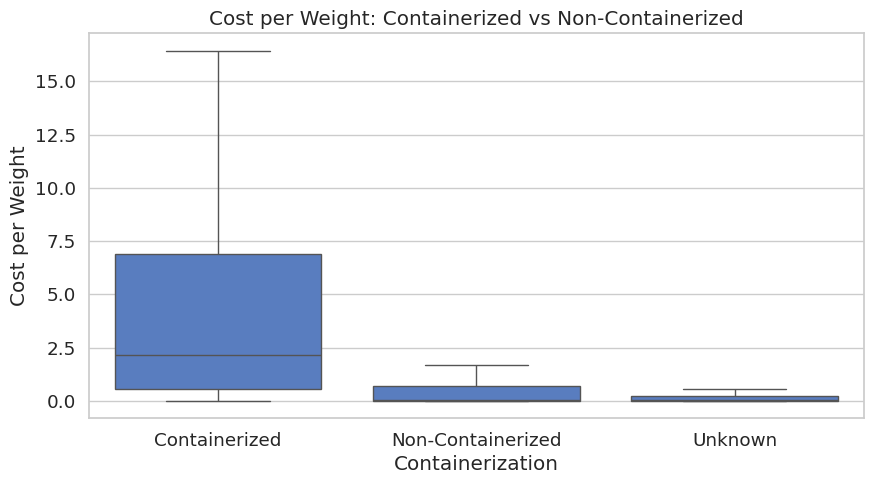

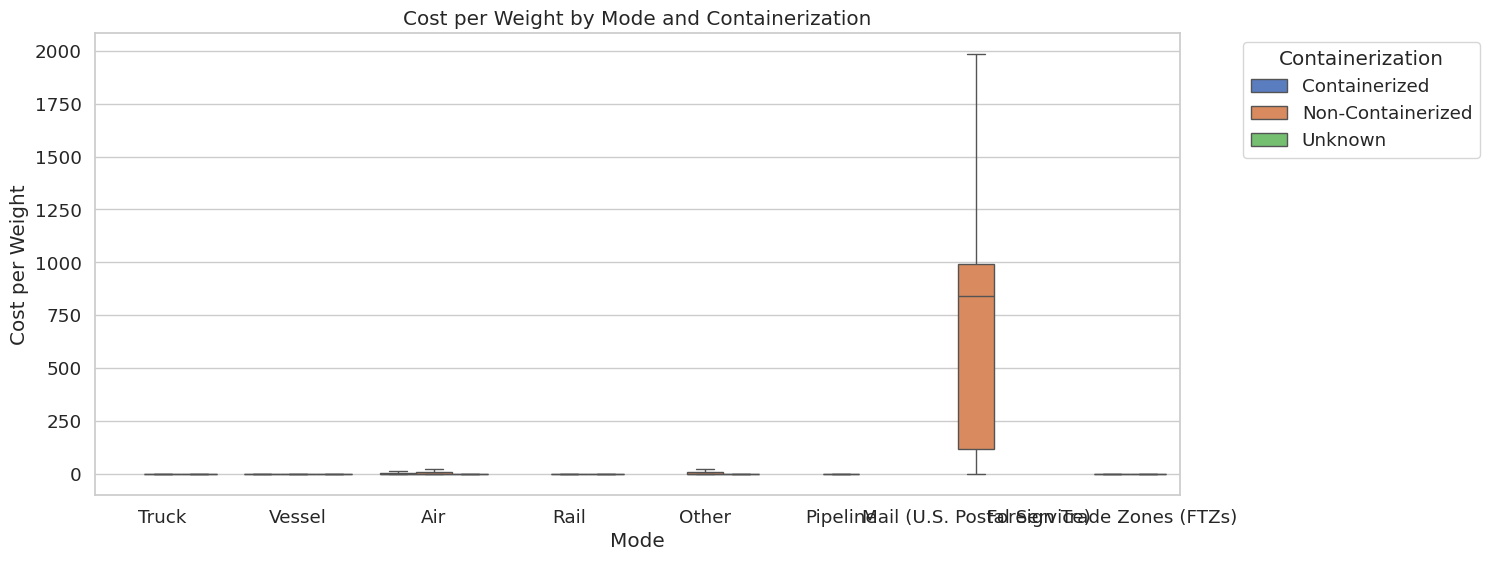

In [17]:
# Compare cost per weight for containerized vs non-containerized
if 'CONTCODE_MAPPED' in data.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, x='CONTCODE_MAPPED', y='COST_PER_WEIGHT', showfliers=False)
    plt.title('Cost per Weight: Containerized vs Non-Containerized')
    plt.ylabel('Cost per Weight')
    plt.xlabel('Containerization')
    plt.show()
    
    # By mode
    plt.figure(figsize=(14,6))
    sns.boxplot(data=data, x='DISAGMOT_MAPPED', y='COST_PER_WEIGHT', hue='CONTCODE_MAPPED', showfliers=False)
    plt.title('Cost per Weight by Mode and Containerization')
    plt.ylabel('Cost per Weight')
    plt.xlabel('Mode')
    plt.legend(title='Containerization', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

---
# Summary & Recommendations

This EDA provides a comprehensive view of North American border freight flows. Key findings include modal dominance, regional and seasonal patterns, operational inefficiencies, and infrastructure bottlenecks.

**Next Steps:**
- Deepen analysis with external economic/environmental data
- Perform advanced feature engineering
- Build predictive or optimization models for freight planning

*Prepared by: Senior Transportation Data Scientist*

## 9. Commodity Analysis
### 9.1 Top Commodities by Volume and Value

Understanding which commodities dominate trade can inform infrastructure, policy, and investment decisions. Here we examine the most frequently shipped and highest-value commodities.

In [ ]:
if 'COMMODITY2' in df.columns or 'COMMODITY2_CLEAN' in df.columns:
    commodity_col = 'COMMODITY2_CLEAN' if 'COMMODITY2_CLEAN' in df.columns else 'COMMODITY2'
    top_commodities = df[commodity_col].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(y=top_commodities.index, x=top_commodities.values)
    plt.title('Top 10 Commodities by Shipment Count')
    plt.xlabel('Number of Shipments')
    plt.ylabel('Commodity')
    plt.show()

    # By total value
    value_by_commodity = df.groupby(commodity_col)['VALUE'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(y=value_by_commodity.index, x=value_by_commodity.values)
    plt.title('Top 10 Commodities by Total Value')
    plt.xlabel('Total Value')
    plt.ylabel('Commodity')
    plt.show()
else:
    print('Commodity column not found in data.')

### 9.2 Commodity vs. Mode Matrix

Some commodities are best suited to specific modes due to their value, perishability, or bulk. This matrix shows the modal split for the top commodities.

In [ ]:
if 'DISAGMOT_MAPPED' in df.columns and ('COMMODITY2_CLEAN' in df.columns or 'COMMODITY2' in df.columns):
    commodity_col = 'COMMODITY2_CLEAN' if 'COMMODITY2_CLEAN' in df.columns else 'COMMODITY2'
    top_commodities = df[commodity_col].value_counts().head(5).index
    pivot = pd.crosstab(df[df[commodity_col].isin(top_commodities)][commodity_col], df['DISAGMOT_MAPPED'])
    pivot.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Modal Split for Top 5 Commodities')
    plt.ylabel('Number of Shipments')
    plt.xlabel('Commodity')
    plt.legend(title='Mode')
    plt.show()
else:
    print('Required columns not found for commodity-mode analysis.')

## 10. Outlier and Anomaly Detection
### 10.1 Extreme Cost per Weight Outliers

Outliers in cost per weight may indicate data errors, special shipments, or inefficiencies. Here we identify and review the most extreme cases.

In [ ]:
outlier_threshold = df['COST_PER_WEIGHT'].quantile(0.99)
outliers = df[df['COST_PER_WEIGHT'] > outlier_threshold]
print(f"Number of extreme outliers (top 1%): {len(outliers)}")
display(outliers[['DISAGMOT_MAPPED', 'PORT_DISTRICT_MAPPED', 'COST_PER_WEIGHT', 'FREIGHT_CHARGES', 'SHIPWT']].sort_values('COST_PER_WEIGHT', ascending=False).head(10))

### 10.2 Temporal Anomalies

Sudden spikes or drops in volume or cost may indicate disruptions, policy changes, or data issues.

In [ ]:
if 'YEAR' in df.columns and 'MONTH_MAPPED' in df.columns:
    monthly_counts = df.groupby(['YEAR', 'MONTH_MAPPED']).size().unstack(fill_value=0)
    monthly_counts.T.plot(figsize=(14,6))
    plt.title('Monthly Shipment Counts Over Time')
    plt.ylabel('Number of Shipments')
    plt.xlabel('Month')
    plt.show()
else:
    print('YEAR or MONTH_MAPPED column not found for temporal anomaly analysis.')

## 11. Geospatial Analysis
### 11.1 Mapping Freight Flows

If latitude/longitude or region codes are available, mapping flows can reveal spatial patterns and bottlenecks.

In [ ]:
# Example: If you have 'ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON'
if {'ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON'}.issubset(df.columns):
    import geopandas as gpd
    import contextily as ctx
    gdf = gpd.GeoDataFrame(df.head(1000), geometry=gpd.points_from_xy(df['ORIGIN_LON'], df['ORIGIN_LAT']))
    ax = gdf.plot(figsize=(10,10), alpha=0.5, markersize=2)
    ctx.add_basemap(ax, crs=gdf.crs)
    plt.title('Sample Origin Points of Shipments')
    plt.show()
else:
    print('No geospatial columns found for mapping.')

## 12. Data Quality and Completeness
### 12.1 Missing Data Patterns

Understanding where data is missing helps target data improvement efforts and avoid biased analysis.

In [ ]:
import missingno as msno
msno.matrix(df.sample(min(1000, len(df))))
plt.title('Missing Data Matrix (Sample)')
plt.show()

msno.heatmap(df)
plt.title('Missing Data Correlation Heatmap')
plt.show()

## 13. Correlation and Multivariate Analysis
### 13.1 Correlation Heatmap

Examining correlations between numeric variables can reveal key drivers and potential redundancies.

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 14. Advanced: Principal Component Analysis (PCA)

PCA can help identify the main axes of variation in the data, useful for clustering or further modeling.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['FREIGHT_CHARGES', 'SHIPWT', 'VALUE', 'COST_PER_WEIGHT']
features = [f for f in features if f in df.columns]
if len(features) >= 2:
    X = df[features].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(principalComponents[:,0], principalComponents[:,1], alpha=0.3)
    plt.title('PCA: First Two Principal Components')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
    print('Explained variance ratio:', pca.explained_variance_ratio_)
else:
    print('Not enough numeric features for PCA.')

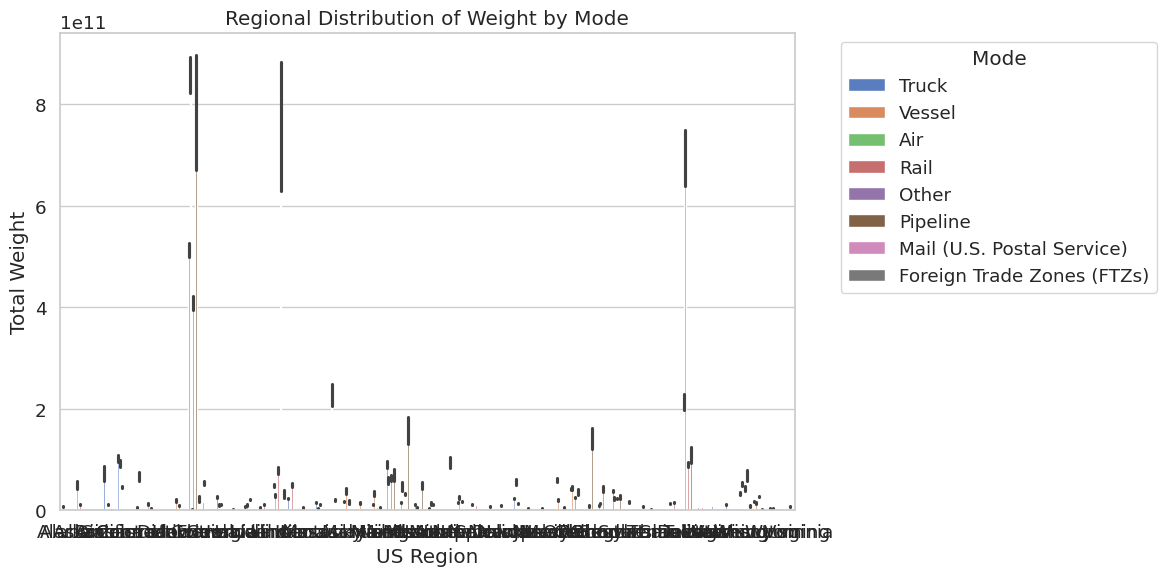

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='USASTATE_MAPPED', y='SHIPWT', hue='DISAGMOT_MAPPED', estimator=sum)
plt.title('Regional Distribution of Weight by Mode')
plt.ylabel('Total Weight')
plt.xlabel('US Region')
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. Cross-Border Trade Analysis
**What are the key trade patterns between the US, Mexico, and Canada, and which modes are most utilized for cross-border freight?**

In [ ]:
# Trade patterns by country
if 'COUNTRY_MAPPED' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='COUNTRY_MAPPED', hue='DISAGMOT_MAPPED')
    plt.title('Freight Mode Distribution by Country')
    plt.ylabel('Count')
    plt.xlabel('Country')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Most used mode per country
    print('Most used mode per country:')
    print(df.groupby('COUNTRY_MAPPED')['DISAGMOT_MAPPED'].agg(lambda x: x.value_counts().idxmax()))

## 5. Seasonal Trends
**How do freight movements and costs vary seasonally across different transportation modes?**

In [ ]:
# If MONTH_MAPPED exists, use it
if 'MONTH_MAPPED' in df.columns:
    plt.figure(figsize=(14,6))
    sns.countplot(data=df, x='MONTH_MAPPED', hue='DISAGMOT_MAPPED', order=[
        'January','February','March','April','May','June','July','August','September','October','November','December'
    ])
    plt.title('Freight Movements by Month and Mode')
    plt.ylabel('Count')
    plt.xlabel('Month')
    plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Average freight charges by month and mode
    charges = df.groupby(['MONTH_MAPPED','DISAGMOT_MAPPED'])['FREIGHT_CHARGES'].mean().unstack()
    charges.loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(kind='line', figsize=(14,6))
    plt.title('Average Freight Charges by Month and Mode')
    plt.ylabel('Avg Freight Charges')
    plt.xlabel('Month')
    plt.show()

## 6. Economic Disruption Impact
**How do trade values and freight movements correlate with economic indicators across different time periods?**

We analyze the correlation between trade value, freight charges, and shipment weight over time. For full economic indicator correlation, external data would be needed.

In [ ]:
# Correlation between VALUE and FREIGHT_CHARGES over time
if 'YEAR' in df.columns:
    yearly = df.groupby('YEAR').agg({'VALUE':'sum','FREIGHT_CHARGES':'sum','SHIPWT':'sum'})
    yearly[['VALUE','FREIGHT_CHARGES','SHIPWT']].plot(kind='bar', figsize=(12,6))
    plt.title('Yearly Trade Value, Freight Charges, and Shipment Weight')
    plt.ylabel('Total')
    plt.xlabel('Year')
    plt.show()
    
    # Correlation matrix
    print('Correlation matrix:')
    print(yearly.corr())

## 7. Infrastructure Utilization
**Which ports and districts show the highest utilization rates, and where are potential bottlenecks?**

In [ ]:
# Top 10 ports/districts by record count
if 'PORT_DISTRICT_MAPPED' in df.columns:
    port_counts = df['PORT_DISTRICT_MAPPED'].value_counts().head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=port_counts.values, y=port_counts.index)
    plt.title('Top 10 Ports/Districts by Utilization')
    plt.xlabel('Number of Records')
    plt.ylabel('Port/District')
    plt.show()
    
    # Potential bottlenecks: ports with high count but high avg cost per weight
    port_ineff = df.groupby('PORT_DISTRICT_MAPPED')['COST_PER_WEIGHT'].mean().sort_values(ascending=False).head(10)
    port_ineff.plot(kind='barh', figsize=(10,6))
    plt.title('Top 10 Potential Bottleneck Ports (High Avg Cost/Weight)')
    plt.xlabel('Avg Cost per Weight')
    plt.ylabel('Port/District')
    plt.show()

## 8. Containerization Efficiency
**What is the relationship between containerization and freight efficiency across different modes and routes?**

In [ ]:
# Compare cost per weight for containerized vs non-containerized
if 'CONTCODE_MAPPED' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='CONTCODE_MAPPED', y='COST_PER_WEIGHT', showfliers=False)
    plt.title('Cost per Weight: Containerized vs Non-Containerized')
    plt.ylabel('Cost per Weight')
    plt.xlabel('Containerization')
    plt.show()
    
    # By mode
    plt.figure(figsize=(14,6))
    sns.boxplot(data=df, x='DISAGMOT_MAPPED', y='COST_PER_WEIGHT', hue='CONTCODE_MAPPED', showfliers=False)
    plt.title('Cost per Weight by Mode and Containerization')
    plt.ylabel('Cost per Weight')
    plt.xlabel('Mode')
    plt.legend(title='Containerization', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

---
# Summary & Recommendations

This EDA provides a comprehensive view of North American border freight flows. Key findings include modal dominance, regional and seasonal patterns, operational inefficiencies, and infrastructure bottlenecks.

**Next Steps:**
- Deepen analysis with external economic/environmental data
- Perform advanced feature engineering
- Build predictive or optimization models for freight planning

*Prepared by: Senior Transportation Data Scientist*

## 9. Commodity Analysis
### 9.1 Top Commodities by Volume and Value

Understanding which commodities dominate trade can inform infrastructure, policy, and investment decisions. Here we examine the most frequently shipped and highest-value commodities.

In [ ]:
if 'COMMODITY2' in df.columns or 'COMMODITY2_CLEAN' in df.columns:
    commodity_col = 'COMMODITY2_CLEAN' if 'COMMODITY2_CLEAN' in df.columns else 'COMMODITY2'
    top_commodities = df[commodity_col].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(y=top_commodities.index, x=top_commodities.values)
    plt.title('Top 10 Commodities by Shipment Count')
    plt.xlabel('Number of Shipments')
    plt.ylabel('Commodity')
    plt.show()

    # By total value
    value_by_commodity = df.groupby(commodity_col)['VALUE'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(y=value_by_commodity.index, x=value_by_commodity.values)
    plt.title('Top 10 Commodities by Total Value')
    plt.xlabel('Total Value')
    plt.ylabel('Commodity')
    plt.show()
else:
    print('Commodity column not found in data.')

### 9.2 Commodity vs. Mode Matrix

Some commodities are best suited to specific modes due to their value, perishability, or bulk. This matrix shows the modal split for the top commodities.

In [ ]:
if 'DISAGMOT_MAPPED' in df.columns and ('COMMODITY2_CLEAN' in df.columns or 'COMMODITY2' in df.columns):
    commodity_col = 'COMMODITY2_CLEAN' if 'COMMODITY2_CLEAN' in df.columns else 'COMMODITY2'
    top_commodities = df[commodity_col].value_counts().head(5).index
    pivot = pd.crosstab(df[df[commodity_col].isin(top_commodities)][commodity_col], df['DISAGMOT_MAPPED'])
    pivot.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Modal Split for Top 5 Commodities')
    plt.ylabel('Number of Shipments')
    plt.xlabel('Commodity')
    plt.legend(title='Mode')
    plt.show()
else:
    print('Required columns not found for commodity-mode analysis.')

## 10. Outlier and Anomaly Detection
### 10.1 Extreme Cost per Weight Outliers

Outliers in cost per weight may indicate data errors, special shipments, or inefficiencies. Here we identify and review the most extreme cases.

In [ ]:
outlier_threshold = df['COST_PER_WEIGHT'].quantile(0.99)
outliers = df[df['COST_PER_WEIGHT'] > outlier_threshold]
print(f"Number of extreme outliers (top 1%): {len(outliers)}")
display(outliers[['DISAGMOT_MAPPED', 'PORT_DISTRICT_MAPPED', 'COST_PER_WEIGHT', 'FREIGHT_CHARGES', 'SHIPWT']].sort_values('COST_PER_WEIGHT', ascending=False).head(10))

### 10.2 Temporal Anomalies

Sudden spikes or drops in volume or cost may indicate disruptions, policy changes, or data issues.

In [ ]:
if 'YEAR' in df.columns and 'MONTH_MAPPED' in df.columns:
    monthly_counts = df.groupby(['YEAR', 'MONTH_MAPPED']).size().unstack(fill_value=0)
    monthly_counts.T.plot(figsize=(14,6))
    plt.title('Monthly Shipment Counts Over Time')
    plt.ylabel('Number of Shipments')
    plt.xlabel('Month')
    plt.show()
else:
    print('YEAR or MONTH_MAPPED column not found for temporal anomaly analysis.')

## 11. Geospatial Analysis
### 11.1 Mapping Freight Flows

If latitude/longitude or region codes are available, mapping flows can reveal spatial patterns and bottlenecks.

In [ ]:
# Example: If you have 'ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON'
if {'ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON'}.issubset(df.columns):
    import geopandas as gpd
    import contextily as ctx
    gdf = gpd.GeoDataFrame(df.head(1000), geometry=gpd.points_from_xy(df['ORIGIN_LON'], df['ORIGIN_LAT']))
    ax = gdf.plot(figsize=(10,10), alpha=0.5, markersize=2)
    ctx.add_basemap(ax, crs=gdf.crs)
    plt.title('Sample Origin Points of Shipments')
    plt.show()
else:
    print('No geospatial columns found for mapping.')

## 12. Data Quality and Completeness
### 12.1 Missing Data Patterns

Understanding where data is missing helps target data improvement efforts and avoid biased analysis.

In [ ]:
import missingno as msno
msno.matrix(df.sample(min(1000, len(df))))
plt.title('Missing Data Matrix (Sample)')
plt.show()

msno.heatmap(df)
plt.title('Missing Data Correlation Heatmap')
plt.show()

## 13. Correlation and Multivariate Analysis
### 13.1 Correlation Heatmap

Examining correlations between numeric variables can reveal key drivers and potential redundancies.

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 14. Advanced: Principal Component Analysis (PCA)

PCA can help identify the main axes of variation in the data, useful for clustering or further modeling.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['FREIGHT_CHARGES', 'SHIPWT', 'VALUE', 'COST_PER_WEIGHT']
features = [f for f in features if f in df.columns]
if len(features) >= 2:
    X = df[features].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(principalComponents[:,0], principalComponents[:,1], alpha=0.3)
    plt.title('PCA: First Two Principal Components')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
    print('Explained variance ratio:', pca.explained_variance_ratio_)
else:
    print('Not enough numeric features for PCA.')